## <b> -------------------------------Customer Churn Classification------------------------------

Dataset Source: https://www.kaggle.com/blastchar/telco-customer-churn
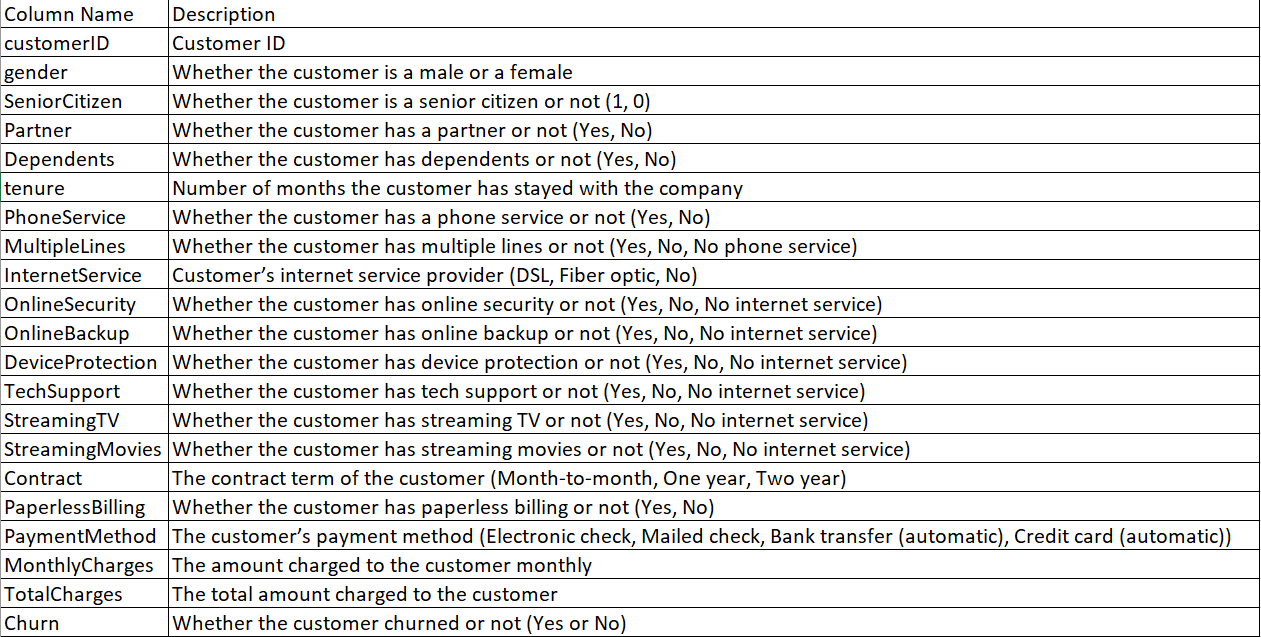

The data set includes information about:
<br>Customers who left within the last month – the target column is called Churn.
<br>Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device <br>protection, tech support, and streaming TV and movies
<br>Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly <br>charges, and total charges
<br>Demographic info about customers – gender, age range, and if they have partners and dependents

In [250]:
#importing Data
churn = pd.read_csv('Churn.csv')

In [251]:
# printing data info for checking any missing or non-consistent columns in the data
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              6843 non-null object
SeniorCitizen       6973 non-null float64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              6958 non-null float64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    6969 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      6966 non-null float64
TotalCharges        6966 non-null object
Churn               7043 non-null object
dtypes: float64(3), object(18

In [252]:
# checking individual columns for missing data
churn.isna().any()

customerID          False
gender               True
SeniorCitizen        True
Partner             False
Dependents          False
tenure               True
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection     True
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges       True
TotalCharges         True
Churn               False
dtype: bool

In [253]:
# percentage of churn in Data set, 26% of the data is churn, this is some what slightly imbalanced dataset  
churn['Churn'].value_counts() / churn.shape[0]

No     0.73463
Yes    0.26537
Name: Churn, dtype: float64

we have gender, SeniorCitizen, tenure, DeviceProtection, MonthlyCharges, TotalCharges

In [254]:
# convert column "TotalCharges" datatype from object to numneric
churn['TotalCharges'] = pd.to_numeric(churn['TotalCharges'], errors='coerce')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022D83FC6588>,
      dtype=object)

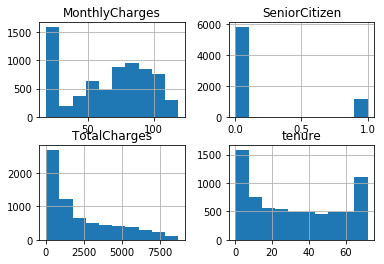

In [255]:
# distribution of continuous variable
churn.hist()

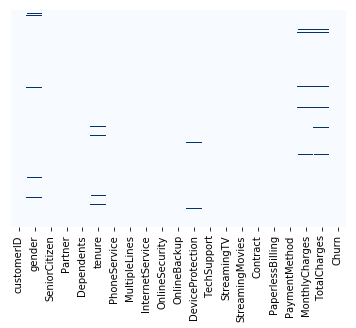

In [256]:
# this heatmap shows columns which have missing values
sns.heatmap(churn.isnull(), yticklabels = False, cbar = False, cmap="Blues")

In [257]:
# checking the head of data
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0.0,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0.0,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0.0,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0.0,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0.0,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [258]:
churn1= churn.copy()

In [259]:
# drop customerID column, as it doesn't help in prediction
churn.drop(['customerID'], axis=1, inplace=True)

In [260]:
# checking for unique values in columns with missing data
churn['gender'].unique()
churn['SeniorCitizen'].unique()
churn['DeviceProtection'].unique()
churn['tenure'].unique()
churn['MonthlyCharges'].unique()
churn['TotalCharges'].unique()

array(['Female', 'Male', nan], dtype=object)

array([ 0.,  1., nan])

array(['No', 'Yes', 'No internet service', nan], dtype=object)

array([ 1., 34.,  2., 45.,  8., 22., 10., 28., 62., 13., 16., 58., 49.,
       25., 69., 52., 71., 21., 12., 30., 47., 72., nan, 27.,  5., 46.,
       11., 70., 17., 63., 43., 15., 60., 18., 66.,  9.,  3., 31., 50.,
       64., 56.,  7., 42., 35., 48., 29., 65., 38., 68., 32., 55., 37.,
       36., 41.,  6.,  4., 33., 67., 23., 57., 61., 14., 20., 53., 40.,
       59., 24., 44., 19., 54., 51., 26.,  0., 39.])

array([29.85, 56.95, 53.85, ..., 63.1 , 44.2 , 78.7 ])

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

In [261]:
churn.describe(include='O')

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,6843,7043,7043,7043,7043,7043,7043,7043,6969,7043,7043,7043,7043,7043,7043,7043
unique,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,3457,3641,4933,6361,3390,3096,3498,3088,3066,3473,2810,2785,3875,4171,2365,5174


In [262]:
# dropped nulls in gender, as you cannot impute it, the column has values f and m in almost equal distribution
churn = churn[churn['gender'].notnull()]

In [263]:
churn['SeniorCitizen'].describe()

count    6775.000000
mean        0.161476
std         0.367997
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: SeniorCitizen, dtype: float64

In [264]:
# dropped nulls in SeniorCitizen, as you cannot impute it, the column has values 0 and 1 in almost equal distribution
churn = churn[churn['SeniorCitizen'].notnull()]

In [265]:
churn['DeviceProtection'].value_counts()

No                     2945
Yes                    2301
No internet service    1456
Name: DeviceProtection, dtype: int64

In [266]:
# dropped nulls in gender, as you cannot impute it, the column has values yes and No in almost equal distribution
churn = churn[churn['DeviceProtection'].notnull()]

In [267]:
# checking datasets after dropping rows with nulls in columns gender, SeniorCitizen & DeviceProtection
churn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6702 entries, 0 to 7042
Data columns (total 20 columns):
gender              6702 non-null object
SeniorCitizen       6702 non-null float64
Partner             6702 non-null object
Dependents          6702 non-null object
tenure              6622 non-null float64
PhoneService        6702 non-null object
MultipleLines       6702 non-null object
InternetService     6702 non-null object
OnlineSecurity      6702 non-null object
OnlineBackup        6702 non-null object
DeviceProtection    6702 non-null object
TechSupport         6702 non-null object
StreamingTV         6702 non-null object
StreamingMovies     6702 non-null object
Contract            6702 non-null object
PaperlessBilling    6702 non-null object
PaymentMethod       6702 non-null object
MonthlyCharges      6626 non-null float64
TotalCharges        6616 non-null float64
Churn               6702 non-null object
dtypes: float64(4), object(16)
memory usage: 1.1+ MB


In [268]:
churn[['MonthlyCharges','TotalCharges']].describe()

,MonthlyCharges,TotalCharges
count,6626.000000,6616.000000
mean,64.611002,2279.914714
std,30.021294,2269.621663
min,18.250000,18.800000
25%,35.462500,400.225000
50%,70.250000,1388.975000
75%,89.700000,3776.175000
max,118.750000,8684.800000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022DFF539F98>,
      dtype=object)

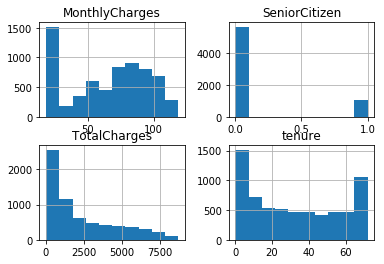

In [269]:
# checking the distribution of continous variables
churn.hist()

In [270]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6702 entries, 0 to 7042
Data columns (total 20 columns):
gender              6702 non-null object
SeniorCitizen       6702 non-null float64
Partner             6702 non-null object
Dependents          6702 non-null object
tenure              6622 non-null float64
PhoneService        6702 non-null object
MultipleLines       6702 non-null object
InternetService     6702 non-null object
OnlineSecurity      6702 non-null object
OnlineBackup        6702 non-null object
DeviceProtection    6702 non-null object
TechSupport         6702 non-null object
StreamingTV         6702 non-null object
StreamingMovies     6702 non-null object
Contract            6702 non-null object
PaperlessBilling    6702 non-null object
PaymentMethod       6702 non-null object
MonthlyCharges      6626 non-null float64
TotalCharges        6616 non-null float64
Churn               6702 non-null object
dtypes: float64(4), object(16)
memory usage: 1.1+ MB


In [271]:
churn_copy = churn.copy()

In [272]:
churn_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6702 entries, 0 to 7042
Data columns (total 20 columns):
gender              6702 non-null object
SeniorCitizen       6702 non-null float64
Partner             6702 non-null object
Dependents          6702 non-null object
tenure              6622 non-null float64
PhoneService        6702 non-null object
MultipleLines       6702 non-null object
InternetService     6702 non-null object
OnlineSecurity      6702 non-null object
OnlineBackup        6702 non-null object
DeviceProtection    6702 non-null object
TechSupport         6702 non-null object
StreamingTV         6702 non-null object
StreamingMovies     6702 non-null object
Contract            6702 non-null object
PaperlessBilling    6702 non-null object
PaymentMethod       6702 non-null object
MonthlyCharges      6626 non-null float64
TotalCharges        6616 non-null float64
Churn               6702 non-null object
dtypes: float64(4), object(16)
memory usage: 1.1+ MB


In [273]:
churn_copy.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0.0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0.0,No,No,34.0,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0.0,No,No,2.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0.0,No,No,45.0,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0.0,No,No,2.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [274]:
churn_copy.to_csv(r'churn_copy.csv')

<b> Mapping columns- gender, SeniorCitizen, Partner, Dependents, PhoneService, MultipleLines, OnlineSecurity, OnlineBackup,
DeviceProtection, TechSupport, StreamingTV, StreamingMovies, PaperlessBilling    mapping to 1 and 0

In [275]:
churn_copy['gender'].unique()
churn_copy['gender'] = churn_copy['gender'].map( {'Female': 0, 'Male': 1} ).astype(int)

array(['Female', 'Male'], dtype=object)

In [276]:
churn_copy['SeniorCitizen'].unique()
churn_copy['SeniorCitizen'] = churn_copy['SeniorCitizen'].map( {0.0: 0, 1.0: 1} ).astype(int)

array([0., 1.])

In [277]:
churn_copy['Partner'].unique()
churn_copy['Partner'] = churn_copy['Partner'].map( {'Yes': 1, 'No': 0} ).astype(int)

array(['Yes', 'No'], dtype=object)

In [278]:
churn_copy['Dependents'].unique()
churn_copy['Dependents'] = churn_copy['Dependents'].map( {'Yes': 1, 'No': 0} ).astype(int)

array(['No', 'Yes'], dtype=object)

In [279]:
churn_copy['PhoneService'].unique()
churn_copy['PhoneService'] = churn_copy['PhoneService'].map( {'Yes': 1, 'No': 0} ).astype(int)

array(['No', 'Yes'], dtype=object)

In [280]:
churn_copy['MultipleLines'].unique()
churn_copy['MultipleLines'] = churn_copy['MultipleLines'].map( {'Yes': 1, 'No': 0, 'No phone service':0} ).astype(int)

array(['No phone service', 'No', 'Yes'], dtype=object)

In [281]:
churn_copy['OnlineSecurity'].unique()
churn_copy['OnlineSecurity'] = churn_copy['OnlineSecurity'].map( {'Yes': 1, 'No': 0, 'No internet service':0} ).astype(int)

array(['No', 'Yes', 'No internet service'], dtype=object)

In [282]:
churn_copy['OnlineBackup'].unique()
churn_copy['OnlineBackup'] = churn_copy['OnlineBackup'].map( {'Yes': 1, 'No': 0, 'No internet service':0} ).astype(int)

array(['Yes', 'No', 'No internet service'], dtype=object)

In [283]:
churn_copy['DeviceProtection'].unique()
churn_copy['DeviceProtection'] = churn_copy['DeviceProtection'].map( {'Yes': 1, 'No': 0, 'No internet service':0} ).astype(int)

array(['No', 'Yes', 'No internet service'], dtype=object)

In [284]:
churn_copy['TechSupport'].unique()
churn_copy['TechSupport'] = churn_copy['TechSupport'].map( {'Yes': 1, 'No': 0, 'No internet service':0} ).astype(int)

array(['No', 'Yes', 'No internet service'], dtype=object)

In [285]:
churn_copy['StreamingTV'].unique()
churn_copy['StreamingTV'] = churn_copy['StreamingTV'].map( {'Yes': 1, 'No': 0, 'No internet service':0} ).astype(int)

array(['No', 'Yes', 'No internet service'], dtype=object)

In [286]:
churn_copy['StreamingMovies'].unique()
churn_copy['StreamingMovies'] = churn_copy['StreamingMovies'].map( {'Yes': 1, 'No': 0, 'No internet service':0} ).astype(int)

array(['No', 'Yes', 'No internet service'], dtype=object)

In [287]:
churn_copy['PaperlessBilling'].unique()
churn_copy['PaperlessBilling'] = churn_copy['PaperlessBilling'].map( {'Yes': 1, 'No': 0} ).astype(int)

array(['Yes', 'No'], dtype=object)

In [288]:
churn_copy['tenure'].unique()
churn_copy['tenure'].describe()

array([ 1., 34.,  2., 45.,  8., 22., 10., 28., 62., 13., 16., 58., 49.,
       25., 69., 52., 71., 21., 12., 30., 72., nan, 27.,  5., 46., 11.,
       70., 17., 63., 43., 15., 60., 18., 66., 47.,  9.,  3., 31., 50.,
       64., 56.,  7., 42., 35., 48., 29., 65., 38., 68., 32., 55., 37.,
       36., 41.,  6.,  4., 33., 67., 23., 57., 61., 14., 20., 53., 40.,
       59., 44., 19., 24., 54., 51., 26.,  0., 39.])

count    6622.000000
mean       32.448807
std        24.599164
min         0.000000
25%         9.000000
50%        29.000000
75%        56.000000
max        72.000000
Name: tenure, dtype: float64

In [289]:
churn_copy1= churn_copy.copy()

<b> Variable: Tenure converting continous variable to a categorical, as number of tenure periods can be binned

In [290]:
def tenure_categorical(churn_copy1):
    if churn_copy1['tenure'] <=10:
        return "0 to 10"
    elif (churn_copy1['tenure']>10) & (churn_copy1['tenure']<=20):
        return "10 to 20"
    elif (churn_copy1['tenure']>20) & (churn_copy1['tenure']<=30):
        return "20 to 30"
    elif (churn_copy1['tenure']>30) & (churn_copy1['tenure']<=40):
        return "30 to 40"
    elif (churn_copy1['tenure']>40) & (churn_copy1['tenure']<=50):
        return "40 to 50"
    elif (churn_copy1['tenure']>50) & (churn_copy1['tenure']<=60):
        return "50 to 60"
    elif (churn_copy1['tenure']>60):
        return ">60"
churn_copy1['tenure_cat'] = churn_copy1.apply(lambda churn_copy1:tenure_categorical(churn_copy1), axis = 1)

In [291]:
churn_copy1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_cat
0,0,0,1,0,1.0,0,0,DSL,0,1,...,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,No,0 to 10
1,1,0,0,0,34.0,1,0,DSL,1,0,...,0,0,0,One year,0,Mailed check,56.95,1889.50,No,30 to 40
2,1,0,0,0,2.0,1,0,DSL,1,1,...,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,Yes,0 to 10
3,1,0,0,0,45.0,0,0,DSL,1,0,...,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,No,40 to 50
4,0,0,0,0,2.0,1,0,Fiber optic,0,0,...,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,Yes,0 to 10


## Tenure count frequency

<Figure size 720x720 with 0 Axes>

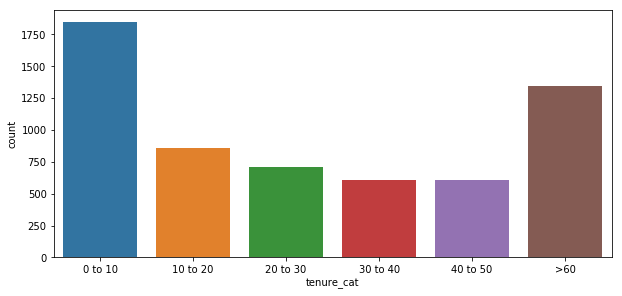

In [292]:
# from the histogram we can see that Maximum customers belong to bucket 1 0-10 tenure periods
plt.figure(figsize=[10,10])
plt.subplot(211)
sns.countplot(x = 'tenure_cat', data=churn_copy1, order= ['0 to 10','10 to 20','20 to 30','30 to 40','40 to 50','>60'])

<b> One hot encoding for  Variable InternetService, Contract , PaymentMethod, as these variables are categorical

In [293]:
churn_copy1 =pd.get_dummies(churn_copy1,columns=['InternetService','Contract','PaymentMethod'], prefix=['InternetService','Contract','PaymentMethod'])

In [294]:
churn_copy1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1.0,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34.0,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2.0,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45.0,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2.0,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [295]:
# we observe we have missing values in columns tenure, MonthlyCharges, TotalCharges
churn_copy1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6702 entries, 0 to 7042
Data columns (total 28 columns):
gender                                     6702 non-null int32
SeniorCitizen                              6702 non-null int32
Partner                                    6702 non-null int32
Dependents                                 6702 non-null int32
tenure                                     6622 non-null float64
PhoneService                               6702 non-null int32
MultipleLines                              6702 non-null int32
OnlineSecurity                             6702 non-null int32
OnlineBackup                               6702 non-null int32
DeviceProtection                           6702 non-null int32
TechSupport                                6702 non-null int32
StreamingTV                                6702 non-null int32
StreamingMovies                            6702 non-null int32
PaperlessBilling                           6702 non-null int32
MonthlyCh

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022D84AC72E8>,
      dtype=object)

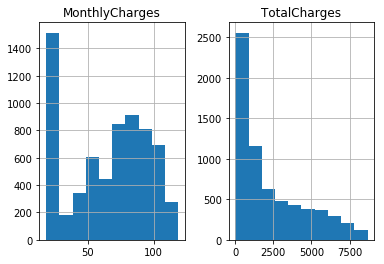

In [296]:
# We will impute MonthlyCharges, TotalCharges after train test split, as we will impute it with it's mean value
churn_copy1.hist(['MonthlyCharges','TotalCharges'])

## Using Pearson Correlation

<Figure size 1800x1800 with 0 Axes>

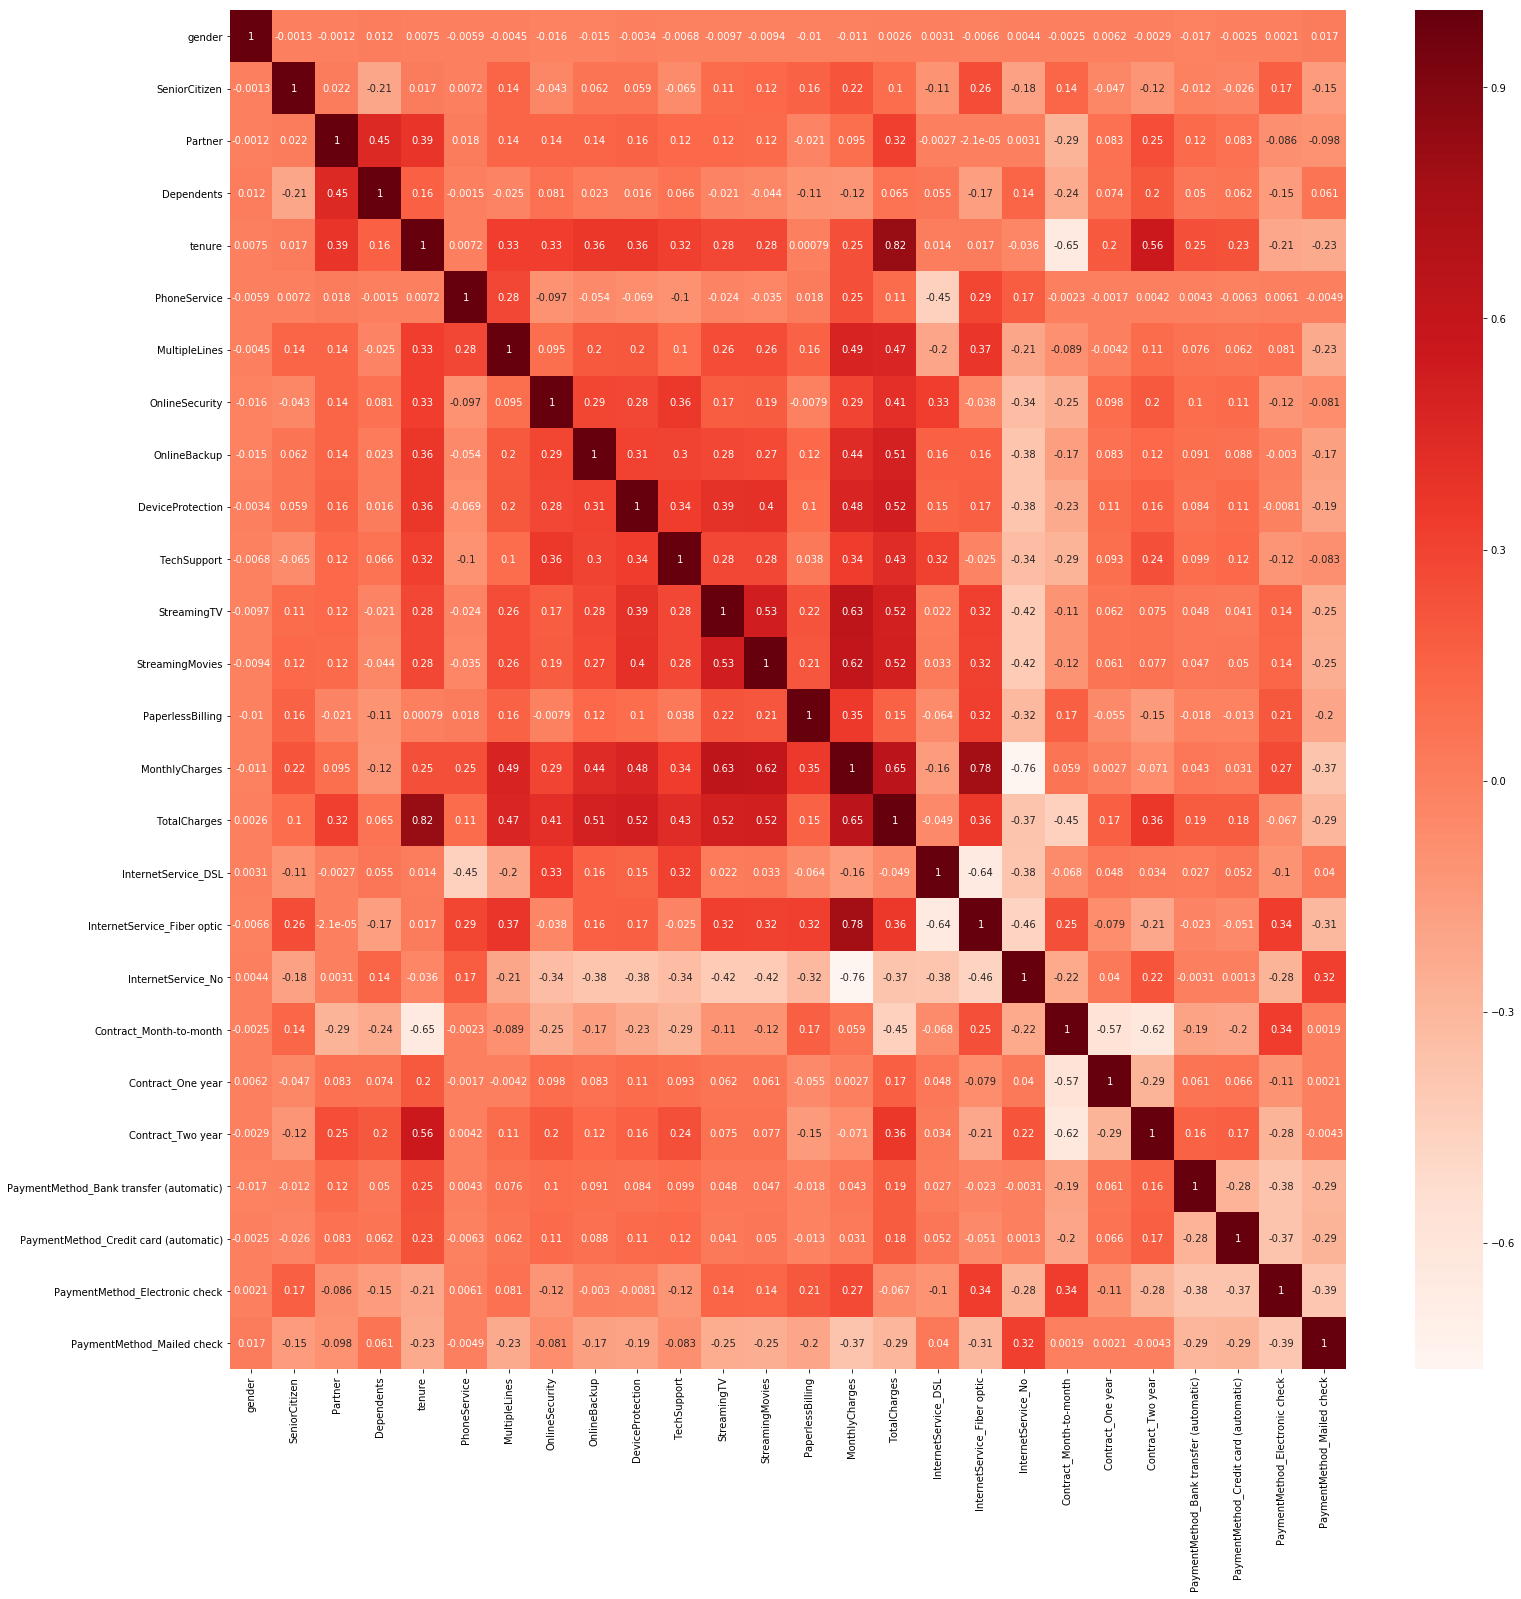

In [297]:
# we observe that tenure and TotalCharges are highly correlated
# we also observe that TotalCharges is highly correlated with Multiplelines, OnlineSecurity, OnlineBackup, DeviceProtection, StreamingTv, StreamingMovies
plt.figure(figsize=(25,25))
cor = churn_copy1.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [298]:
# Mapping for target variable Churn
churn_copy1['Churn'].unique()
churn_copy1['Churn'] = churn_copy1['Churn'].map( {'Yes': 1, 'No': 0} ).astype(int)

array(['No', 'Yes'], dtype=object)

<b> Creating X and y

In [323]:
y = churn_copy1['Churn']

In [324]:
X = churn_copy1.drop('Churn', axis=1)

In [325]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.2)

In [326]:
# Imputing column Tenure with median value, as the distribution of the variable was normal
X_train_org.tenure.fillna(X_train_org.tenure.median(),inplace=True)
X_test_org.tenure.fillna(X_test_org.tenure.median(),inplace=True)

In [327]:
# Imputing column MonthlyCharges with median value, as the distribution of the variable was normal
X_train_org.MonthlyCharges.fillna(X_train_org.MonthlyCharges.median(),inplace=True)
X_test_org.MonthlyCharges.fillna(X_test_org.MonthlyCharges.median(),inplace=True)

In [328]:
# Imputing column TotalCharges with tenure* monthlycharges, imputing nulls with this calculated field
X_train_org['TotalCharges'] = X_train_org.apply(lambda row: row['MonthlyCharges']*row['tenure'] if np.isnan(row['TotalCharges']) else row['TotalCharges'],axis=1)
X_test_org['TotalCharges'] = X_test_org.apply(lambda row: row['MonthlyCharges']*row['tenure'] if np.isnan(row['TotalCharges']) else row['TotalCharges'],axis=1)

In [329]:
X_train_org['tenure_cat'] = X_train_org.apply(lambda X_train_org:tenure_categorical(X_train_org), axis = 1)
X_test_org['tenure_cat'] = X_test_org.apply(lambda X_test_org:tenure_categorical(X_test_org), axis = 1)

In [330]:
# On hot encoding for variable tenure, after the imputation of tenure with it's median value
X_train_org =pd.get_dummies(X_train_org,columns=['tenure_cat'], prefix=['tenure_cat'])
X_test_org =pd.get_dummies(X_test_org,columns=['tenure_cat'], prefix=['tenure_cat'])

In [331]:
# Applying MinMaxScalingtechniques produces values of range [0,1]. Our dataset has features with hard boundaries. 
# It does not have outliers.
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)
#converting to dataframe
#X_train = pd.DataFrame(X_train, columns = X.columns)

In [347]:
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn import linear_model
from sklearn.model_selection import cross_val_score

## Logistic Regression- with grid search & cross validation

In [348]:
best_score=0
for C in [0.001, 0.01, 0.1, 1, 10, 100]:
    logit = LogisticRegression(C=C)
    scores = cross_val_score(logit, X_train, y_train, cv=10)
        # compute mean cross-validation accuracy
    score = np.mean(scores)
        # if we got a better score, store the score and parameters
    if score > best_score:
        best_score = score
        best_parameters = {'C': C}
            
print("Best parameter", best_parameters)
print("best_score", best_score)
#best model with best C, best cross validation score

Best parameter {'C': 10}
best_score 0.8015262375274466


In [349]:
# rebuild a model on the combined training and validation set
logit = LogisticRegression(**best_parameters)
logit.fit(X_train, y_train)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [350]:
# test set score
scores= logit.score(X_train,y_train)
print("Accuracy Train scores: {}".format(scores))
scpres= logit.score(X_test, y_test)
print("Accuracy Train scores: {}".format(scores))

Accuracy Train scores: 0.8032083566498788
Accuracy Train scores: 0.8032083566498788


In [363]:
# prediction
pred_logit = logit.predict(X_test)
print("logit score: {:.2f}".format(logit.score(X_test, y_test)))

logit score: 0.82


In [364]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, pred_logit)
print("Confusion matrix:\n{}".format(confusion))

Confusion matrix:
[[923  76]
 [166 176]]


## KNN classification

In [365]:
from sklearn.neighbors import KNeighborsClassifier

best_score=0
for k in range(1,20):
    knn = KNeighborsClassifier(k)
    scores = cross_val_score(knn, X_train, y_train, cv=10)
        # compute mean cross-validation accuracy
    score = np.mean(scores)
        # if we got a better score, store the score and parameters
    if score > best_score:
        best_score = score
        best_parameters = k
            

print("Best parameter", best_parameters)
print("best_score", best_score)

#train_score_array.append(knn.score(X_train_selected, y_train))
#test_score_array.append(knn.score(X_test_selected, y_test))

Best parameter 18
best_score 0.7938804580449708


In [366]:
# rebuild a model on the combined training and validation set
knn = KNeighborsClassifier(best_parameters)
knn.fit(X_train, y_train)
# test set score
scores= knn.score(X_train,y_train)
print("Accuracy Train scores: {}".format(scores))
scores= knn.score(X_test, y_test)
print("Accuracy Train scores: {}".format(scores))
# prediction
pred_knn = knn.predict(X_test)
print("Knn score: {:.2f}".format(knn.score(X_test, y_test)))
#confusion matrix
confusion = confusion_matrix(y_test, pred_knn)
print("Confusion matrix:\n{}".format(confusion))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=18, p=2,
                     weights='uniform')

Accuracy Train scores: 0.8116023130013057
Accuracy Train scores: 0.7979120059656972
Knn score: 0.80
Confusion matrix:
[[885 114]
 [157 185]]


## Linear SVM

In [367]:
from sklearn.svm import LinearSVC
best_score=0
for C in [0.001, 0.01, 0.1, 1, 10, 100]:
    LnSVM = LinearSVC(C=C)
    scores = cross_val_score(LnSVM, X_train, y_train, cv=10)
        # compute mean cross-validation accuracy
    score = np.mean(scores)
        # if we got a better score, store the score and parameters
    if score > best_score:
        best_score = score
        best_parameters = C
            

print("Best parameter", best_parameters)
print("best_score", best_score)

#train_score_array.append(knn.score(X_train_selected, y_train))
#test_score_array.append(knn.score(X_test_selected, y_test))

Best parameter 0.1
best_score 0.7992888212568443


In [368]:
# rebuild a model on the combined training and validation set
LnSVM = LinearSVC(C=best_parameters)
LnSVM.fit(X_train, y_train)
# test set score
scores=LnSVM.score(X_train,y_train)
print("Accuracy Train scores: {}".format(scores))
LnSVM.score(X_test, y_test)
print(" Accuracy Test scores: {}".format(scores))
# prediction
pred_LnSVM = LnSVM.predict(X_test)
print("Knn score: {:.2f}".format(LnSVM.score(X_test, y_test)))
#confusion matrix
confusion = confusion_matrix(y_test, pred_LnSVM)
print("Confusion matrix:\n{}".format(confusion))

LinearSVC(C=0.1, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

Accuracy Train scores: 0.8007834359261332


0.819537658463833

 Accuracy Test scores: 0.8007834359261332
Knn score: 0.82
Confusion matrix:
[[932  67]
 [175 167]]


## Decision Tree

In [369]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
param_grid = {'max_depth': [2,5,8,10],
              'min_samples_leaf':[2,5,8,10]}
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'max_depth': [2, 5, 8, 10], 'min_samples_leaf': [2, 5, 8, 10]}


In [370]:
from sklearn.model_selection import GridSearchCV
dtree= DecisionTreeClassifier()
grid_search = GridSearchCV(dtree, param_grid, cv=10, return_train_score=True)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [2, 5, 8, 10],
                         'min_samples_leaf': [2, 5, 8, 10]},
             pre_disp

Best parameters: {'max_depth': 5, 'min_samples_leaf': 2}
Best cross-validation score: 0.78


In [371]:
dtree = DecisionTreeClassifier(max_depth=5, min_samples_leaf= 10 ,random_state=0)
dtree.fit(X_train,y_train)
# test set score
scores=dtree.score(X_train,y_train)
print("Accuracy Train scores: {}".format(scores))
scores=dtree.score(X_test, y_test)
print(" Accuracy Test scores: {}".format(scores))
# prediction
pred_dtree = dtree.predict(X_test)
#confusion matrix
confusion = confusion_matrix(y_test, pred_dtree)
print("Confusion matrix:\n{}".format(confusion))

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

Accuracy Train scores: 0.7994777093825779
 Accuracy Test scores: 0.8031319910514542
Confusion matrix:
[[858 141]
 [123 219]]


# Kernelized Support Vector Machine

In [373]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
             'kernel':['rbf']}
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100], 'kernel': ['rbf']}


In [374]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
grid_search = GridSearchCV(SVC(), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

Best parameters: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Best cross-validation score: 0.80


In [375]:
# rebuild a model on the combined training and validation set
svm_rbf = SVC(kernel='rbf', gamma= 0.1, C=1,probability=True)
svm_rbf.fit(X_train, y_train)
# test set score
scores= svm_rbf.score(X_train,y_train)
print(" Accuracy Train scores: {}".format(scores))
scores= svm_rbf.score(X_test, y_test)
print(" Accuracy Test scores: {}".format(scores))
# prediction
pred_svm_rbf = svm_rbf.predict(X_test)
print("SVM test accuracy score: {:.2f}".format(svm_rbf.score(X_test, y_test)))
#confusion matrix
confusion = confusion_matrix(y_test, pred_svm_rbf)
print("Confusion matrix:\n{}".format(confusion))

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

 Accuracy Train scores: 0.8119753777280359
 Accuracy Test scores: 0.8165548098434005
SVM test accuracy score: 0.82
Confusion matrix:
[[927  72]
 [174 168]]


## Confusion Matrix for all models

In [376]:
print("Logistic:")
print(confusion_matrix(y_test, pred_logit))
print("\nKNN:")
print(confusion_matrix(y_test, pred_knn))
print("\nLinear SVM:")
print(confusion_matrix(y_test, pred_LnSVM))
print("\nDecision Tree Classifier")
print(confusion_matrix(y_test, pred_dtree))
print("\nKernelized svm ")
print(confusion_matrix(y_test, pred_svm_rbf))

Logistic:
[[923  76]
 [166 176]]

KNN:
[[885 114]
 [157 185]]

Linear SVM:
[[932  67]
 [175 167]]

Decision Tree Classifier
[[858 141]
 [123 219]]

Kernelized svm 
[[927  72]
 [174 168]]


In [377]:
from sklearn.metrics import f1_score

print("f1 score logistic: {:.2f}".format(f1_score(y_test, pred_logit)))
print("f1 score knn: {:.2f}".format(f1_score(y_test, pred_knn)))
print("f1 score linearSVM: {:.2f}".format(f1_score(y_test, pred_LnSVM)))
print("f1 score DecisionTreeClassifier: {:.2f}".format(f1_score(y_test, pred_dtree)))
print("f1 score Kernelized svm: {:.2f}".format(f1_score(y_test, pred_svm_rbf)))

f1 score logistic: 0.59
f1 score knn: 0.58
f1 score linearSVM: 0.58
f1 score DecisionTreeClassifier: 0.62
f1 score Kernelized svm: 0.58


# Model scores

In [378]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, auc, classification_report, log_loss, precision_score, recall_score, roc_auc_score, roc_curve,matthews_corrcoef
def score_print(y,y_pred,count):
    b=[]
    b.append(confusion_matrix(y,y_pred[count]))
    b.append(accuracy_score(y,y_pred[count]))
    b.append(precision_score(y,y_pred[count]))
    b.append(recall_score(y,y_pred[count]))
    b.append(f1_score(y,y_pred[count]))
    fpr, tpr, thresholds = roc_curve(y, y_pred[count])
    b.append(auc(fpr, tpr))
    return b

In [379]:
dtree = DecisionTreeClassifier(max_depth=5,min_samples_leaf= 10, random_state=0)
dtree.fit(X_train,y_train)
knn= KNeighborsClassifier(n_neighbors=18)
knn.fit(X_train,y_train)
logit=LogisticRegression(C=10,penalty='l1')
logit.fit(X_train,y_train)
LnSVM = LinearSVC(C=0.1)
LnSVM.fit(X_train,y_train)
svm_rbf=SVC(kernel='rbf',gamma=0.1,C=1,probability=True)
svm_rbf.fit(X_train,y_train)

models=[dtree,knn,logit,LnSVM,svm_rbf]
y_pred=[]
count=0
scores=[]
for i in models:
    print(count)
    y_pred.append(i.predict(X_test))
    scores.append(score_print(y_test,y_pred,count))
    count=count+1

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=18, p=2,
                     weights='uniform')

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

LinearSVC(C=0.1, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

0
1
2
3
4


In [380]:
simple_models=pd.DataFrame()
simple_models['models']=['dtree','knn','logit','Linear SVM','svm_rbf']
simple_models=pd.concat([simple_models,pd.DataFrame(scores)], axis=1)
simple_models.columns=['models','confusion_matrix','accuracy_score','precision_score','recall_score','f1_score','auc']
simple_models

,models,confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,auc
0,dtree,"[[858, 141], [123, 219]]",0.803132,0.608333,0.640351,0.623932,0.749605
1,knn,"[[885, 114], [157, 185]]",0.797912,0.618729,0.540936,0.577223,0.713411
2,logit,"[[923, 76], [166, 176]]",0.819538,0.698413,0.514620,0.592593,0.719272
3,Linear SVM,"[[932, 67], [175, 167]]",0.819538,0.713675,0.488304,0.579861,0.710619
4,svm_rbf,"[[927, 72], [174, 168]]",0.816555,0.700000,0.491228,0.577320,0.709578


<b> Percentage of targer class (churn) is 26%. We can interpret this dataset as slighly imbalanced. Therefore F1 score is more appropiate for comparing models rather than accuracy. Based on F1 and AUC score decision tree model outperforms the other tested classifiers.